In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,mean_squared_error

In [2]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-12-27 14:03:33--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6032:1::a27d:5201, 162.125.81.1
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6032:1::a27d:5201|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-12-27 14:03:35--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 404 Not Found
2019-12-27 14:03:36 ERROR 404: Not Found.



In [3]:
data=pd.read_csv('mobile_cleaned2.csv')

In [4]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [5]:
data.shape

(341, 88)

In [6]:
Y=data['Rating'].values

In [7]:
threshold=4.2

In [8]:
X=data.drop('Rating',axis=1)

In [9]:
data['class']=(data['Rating']>=threshold)

In [10]:
data['class']=data['class'].astype(np.int)

In [11]:
Y_binarised=data['class']

In [12]:
Y_binarised.value_counts()

0    182
1    159
Name: class, dtype: int64

In [13]:
Y_binarised.value_counts(normalize=True) # For seeing results in percentage we normalised the result

0    0.533724
1    0.466276
Name: class, dtype: float64

# Standardisation

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
R = np.random.random([100,1])

In [16]:
R.shape

(100, 1)

In [17]:
np.mean(R)

0.5012869855600388

In [18]:
np.std(R)

0.2785803545471616

In [19]:
scaler=StandardScaler()

In [20]:
type(scaler)

sklearn.preprocessing.data.StandardScaler

In [21]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaler.mean_

array([0.50128699])

In [23]:
RT=scaler.transform(R)

In [24]:
np.mean(RT)

4.463096558993129e-16

In [25]:
np.std(RT)

0.9999999999999999

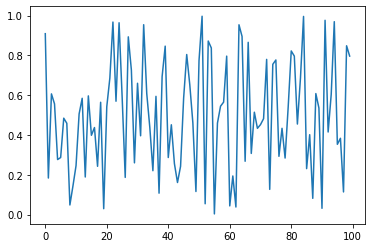

In [26]:
plt.plot(R)

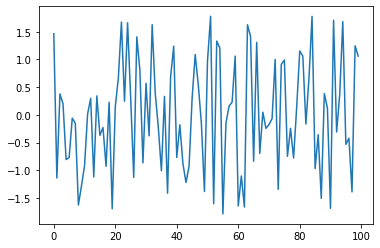

In [27]:
plt.plot(RT) # There is a difference between between both graphs' scales

# Train_Test_Split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [29]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [30]:
scaler=StandardScaler()

In [31]:
X_scaled_train=scaler.fit_transform(X_train)

In [32]:
X_scaled_test=scaler.transform(X_test)

## For doing Standardisation of Y i.e. Label we use MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
minmax_scaler=MinMaxScaler()

In [35]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [36]:
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [37]:
threshold=4.2

In [38]:
scaled_threshold=minmax_scaler.transform(threshold)

In [39]:
scaled_threshold[0][0]

0.6800000000000002

In [40]:
Y_binarised_train=(Y_scaled_train>scaled_threshold[0][0]).astype(int).ravel()

In [41]:
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype(int).ravel()

# Sigmoid Neuron

In [79]:
class Sigmoid_Neuron():
    
    def __init__(self):
        self.w=None
        self.b=None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-self.perceptron(x)))
    
    def grad_w(self,x,Y):
        y_pred=self.sigmoid(x)
        return (y_pred-Y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,Y):
        y_pred=self.sigmoid(x)
        return (y_pred-Y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=0.1,initialise=True,display_loss=False):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
            
        if display_loss:
            loss={}
            
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db
            if display_loss:
                Y_pred=self.sigmoid(X)
                loss[i]=mean_squared_error(Y_pred,Y)
        if display_loss:
            plt.plot(list(loss.values()),list(loss.keys()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean_Squared_Error')
            plt.show()
    
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(x)
            Y_pred.append(y_pred)
        return Y_pred

In [80]:
sn=Sigmoid_Neuron()

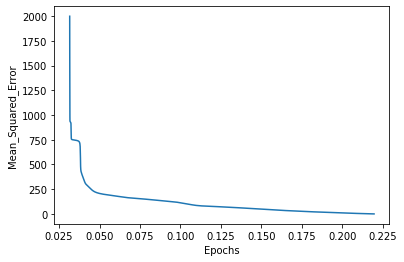

In [110]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=2000,learning_rate=0.015,display_loss=True)

In [111]:
Y_pred_test=sn.predict(X_scaled_test)

In [112]:
Y_pred_train=sn.predict(X_scaled_train)

In [113]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype(int).ravel()

In [114]:
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype(int).ravel()

In [115]:
accuracy_score(Y_pred_binarised_train,Y_binarised_train)

0.8274509803921568

In [116]:
accuracy_score(Y_pred_binarised_test,Y_binarised_test)

0.8255813953488372